In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# setting style
sns.set_style("darkgrid")
# setting context
sns.set_context("paper")
# setting palette
sns.set_palette("deep", color_codes=True)


    PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    Destination - The planet the passenger will be debarking to.
    Age - The age of the passenger.
    VIP - Whether the passenger has paid for special VIP service during the voyage.
    RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    Name - The first and last names of the passenger.
    Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [3]:
data = pd.read_csv(
    r"D:\MScDataScience\9.Research_Methods\Assignment\Assignment3\Spaceship_Titanic\Data\train.csv")

In [72]:
test_data = pd.read_csv(
    r"D:\MScDataScience\9.Research_Methods\Assignment\Assignment3\Spaceship_Titanic\Data\test.csv")

<Axes: >

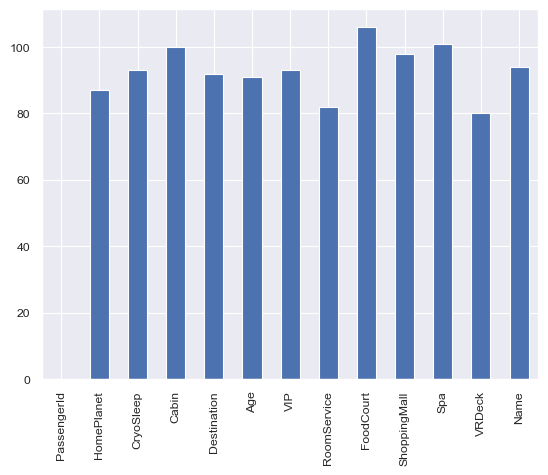

In [74]:
test_data.isna().sum().plot(kind="bar")

In [4]:
data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [5]:
data.shape

(8693, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
data.describe(include="all")

PassengerId HomePlanet CryoSleep    Cabin  Destination          Age  \
count         8693       8492      8476     8494         8511  8514.000000   
unique        8693          3         2     6560            3          NaN   
top        9280_02      Earth     False  G/734/S  TRAPPIST-1e          NaN   
freq             1       4602      5439        8         5915          NaN   
mean           NaN        NaN       NaN      NaN          NaN    28.827930   
std            NaN        NaN       NaN      NaN          NaN    14.489021   
min            NaN        NaN       NaN      NaN          NaN     0.000000   
25%            NaN        NaN       NaN      NaN          NaN    19.000000   
50%            NaN        NaN       NaN      NaN          NaN    27.000000   
75%            NaN        NaN       NaN      NaN          NaN    38.000000   
max            NaN        NaN       NaN      NaN          NaN    79.000000   

          VIP   RoomService     FoodCourt  ShoppingMall           Spa  \
count    8490   8512.000000   8510.000000   8485.000000   8510.000000   
unique      2           NaN           NaN           NaN           NaN   
top     False           NaN           NaN           NaN           NaN   
freq     8291           NaN           NaN           NaN           NaN   
mean      NaN    224.687617    458.077203    173.729169    311.138778   
std       NaN    666.717663   1611.489240    604.696458   1136.705535   
min       NaN      0.000000      0.000000      0.000000      0.000000   
25%       NaN      0.000000      0.000000      0.000000      0.000000   
50%       NaN      0.000000      0.000000      0.000000      0.000000   
75%       NaN     47.000000     76.000000     27.000000     59.000000   
max       NaN  14327.000000  29813.000000  23492.000000  22408.000000   

              VRDeck         Name Transported  
count    8505.000000         8493        8693  
unique           NaN         8473           2  
top              NaN  Anton Woody        True  
freq             NaN            2        4378  
mean      304.854791          NaN         NaN  
std      1145.717189          NaN         NaN  
min         0.000000          NaN         NaN  
25%         0.000000          NaN         NaN  
50%         0.000000          NaN         NaN  
75%        46.000000          NaN         NaN  
max     24133.000000          NaN         NaN

In [8]:
data

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

In [9]:
data.describe(include="object").round().T

count unique          top  freq
PassengerId  8693   8693      9280_02     1
HomePlanet   8492      3        Earth  4602
CryoSleep    8476      2        False  5439
Cabin        8494   6560      G/734/S     8
Destination  8511      3  TRAPPIST-1e  5915
VIP          8490      2        False  8291
Name         8493   8473  Anton Woody     2

In [10]:
data.describe().round().T

count   mean     std  min   25%   50%   75%      max
Age           8514.0   29.0    14.0  0.0  19.0  27.0  38.0     79.0
RoomService   8512.0  225.0   667.0  0.0   0.0   0.0  47.0  14327.0
FoodCourt     8510.0  458.0  1611.0  0.0   0.0   0.0  76.0  29813.0
ShoppingMall  8485.0  174.0   605.0  0.0   0.0   0.0  27.0  23492.0
Spa           8510.0  311.0  1137.0  0.0   0.0   0.0  59.0  22408.0
VRDeck        8505.0  305.0  1146.0  0.0   0.0   0.0  46.0  24133.0

In [11]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [12]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Axes: >

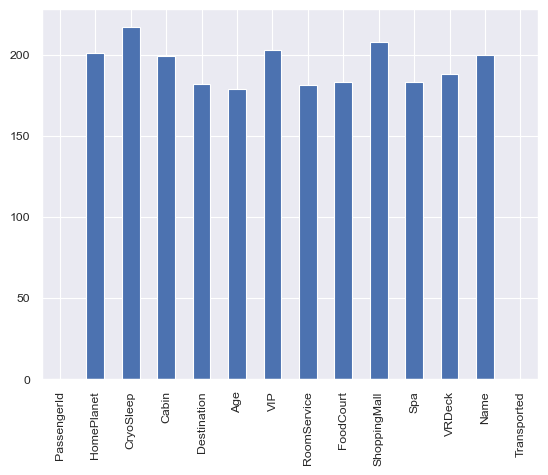

In [13]:
data.isnull().sum().plot(kind="bar")

In [14]:
np.round(data.isnull().sum() / data.shape[0], 2)

PassengerId     0.00
HomePlanet      0.02
CryoSleep       0.02
Cabin           0.02
Destination     0.02
Age             0.02
VIP             0.02
RoomService     0.02
FoodCourt       0.02
ShoppingMall    0.02
Spa             0.02
VRDeck          0.02
Name            0.02
Transported     0.00
dtype: float64

<Axes: >

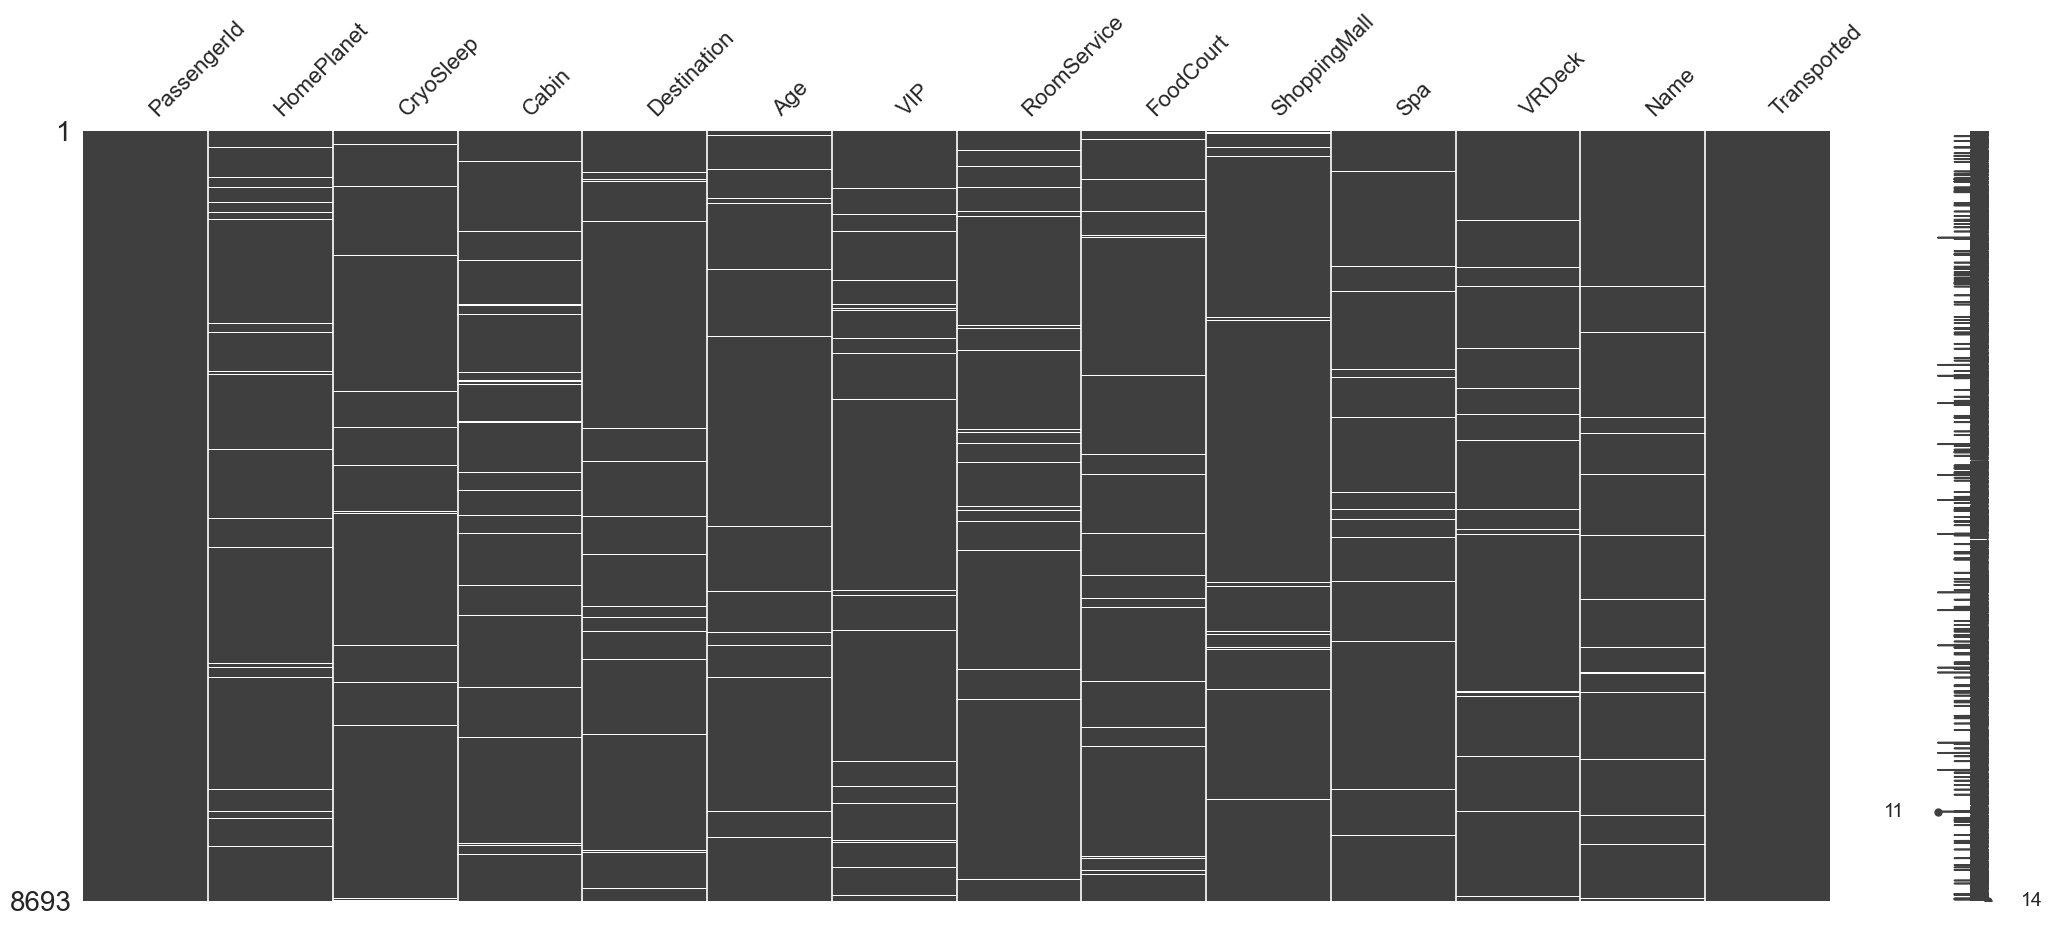

In [15]:
msno.matrix(data)

<Axes: >

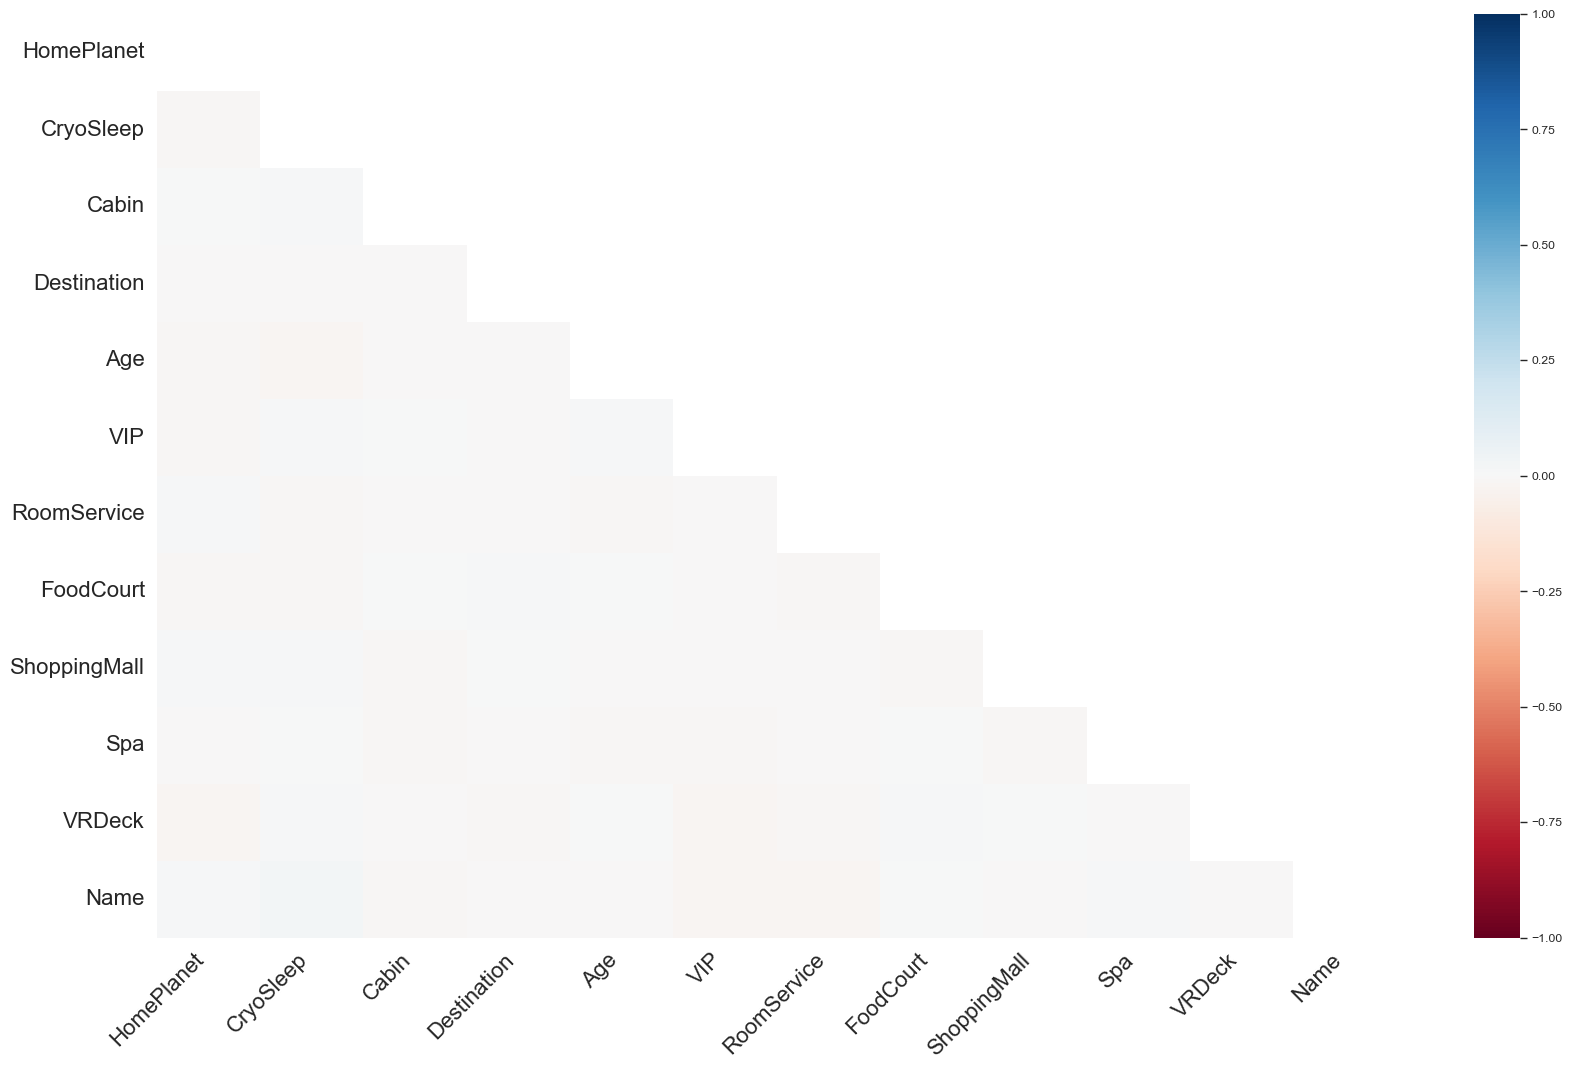

In [16]:
msno.heatmap(data)

In [17]:
data.duplicated().sum()

np.int64(0)

In [18]:
data["GroupID"] = data["PassengerId"].apply(
    lambda grp_id: grp_id.split("_")[0])

In [19]:
data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported GroupID  
0        False    0001  
1         True    0002  
2        False    0003  
3        False    0003  
4         True    0004

In [20]:
data["GroupID"].unique()

array(['0001', '0002', '0003', ..., '9278', '9279', '9280'],
      shape=(6217,), dtype=object)

In [21]:
data["GroupID"].nunique()

6217

In [22]:
data["GroupID"].value_counts()

GroupID
9081    8
4005    8
8988    8
5133    8
4256    8
       ..
0022    1
0016    1
0015    1
0014    1
0012    1
Name: count, Length: 6217, dtype: int64

In [23]:
data["GroupSizes"] = data["GroupID"].map(
    lambda size: data["GroupID"].value_counts()[size])

In [24]:
data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported GroupID  GroupSizes  
0        False    0001           1  
1         True    0002           1  
2        False    0003           2  
3        False    0003           2  
4         True    0004           1

In [25]:
data[data["GroupID"] == "9081"]

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
8507     9081_01      Earth     False  G/1476/P    TRAPPIST-1e   8.0  False   
8508     9081_02      Earth     False  F/1858/P    55 Cancri e  15.0  False   
8509     9081_03      Earth      True       NaN    TRAPPIST-1e   1.0  False   
8510     9081_04      Earth     False  G/1476/P    TRAPPIST-1e   9.0  False   
8511     9081_05      Earth     False  F/1858/P    TRAPPIST-1e  48.0  False   
8512     9081_06      Earth     False  F/1858/P  PSO J318.5-22  16.0    NaN   
8513     9081_07      Earth      True  G/1476/P    TRAPPIST-1e  27.0  False   
8514     9081_08      Earth      True  G/1476/P  PSO J318.5-22   3.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck               Name  \
8507          0.0        0.0           0.0    0.0     0.0   Hanna Clemondsey   
8508          0.0        0.0           0.0  208.0   754.0  Willah Clemondsey   
8509          0.0        0.0           0.0    0.0     0.0   Beula Clemondsey   
8510          0.0        0.0           0.0    0.0     0.0                NaN   
8511          0.0      586.0         784.0    4.0    21.0   Haryn Clemondsey   
8512          0.0        0.0         761.0    0.0     0.0  Daryla Clemondsey   
8513          0.0        0.0           0.0    0.0     0.0   Aliey Clemondsey   
8514          0.0        0.0           0.0    0.0     0.0  Virgie Clemondsey   

      Transported GroupID  GroupSizes  
8507        False    9081           8  
8508        False    9081           8  
8509        False    9081           8  
8510         True    9081           8  
8511         True    9081           8  
8512        False    9081           8  
8513         True    9081           8  
8514         True    9081           8

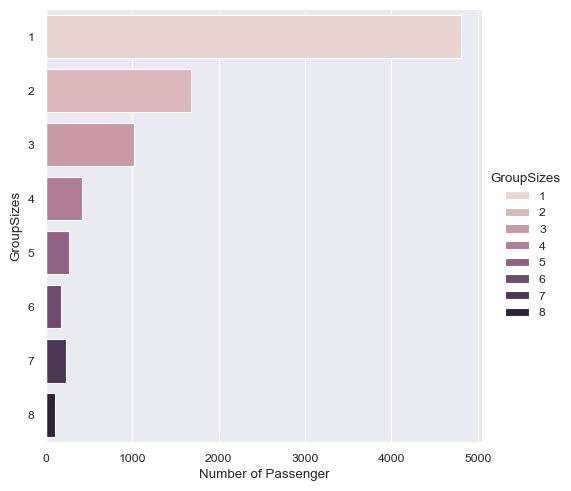

In [26]:
sns.catplot(data, y="GroupSizes", kind="count",
            hue="GroupSizes", legend="full")
plt.xlabel("Number of Passenger")
plt.show()

<Axes: ylabel='Transported'>

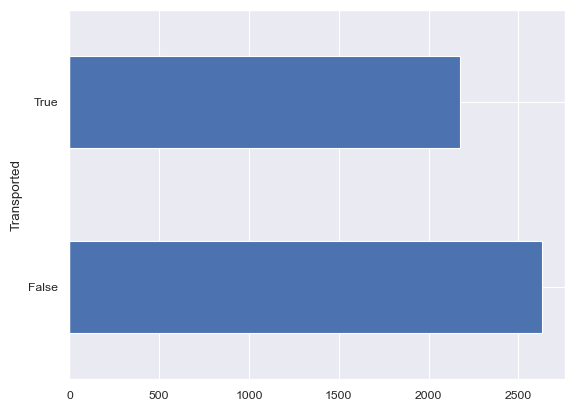

In [80]:
data[data["GroupSizes"] == 1]["Transported"].value_counts().plot(kind="barh")

In [27]:
# data["CabinDeck"] = data["Cabin"].apply(
#     lambda x: x.str.split("/")[0]).astype(str)

In [28]:
data["Cabin"].str.split("/", expand=True)

0     1  2
0     B     0  P
1     F     0  S
2     A     0  S
3     A     0  S
4     F     1  S
...  ..   ... ..
8688  A    98  P
8689  G  1499  S
8690  G  1500  S
8691  E   608  S
8692  E   608  S

[8693 rows x 3 columns]

In [29]:
cabin_parts = data["Cabin"].str.split("/", expand=True)
data["CabinDeck"] = cabin_parts[0].astype('category')
data["CabinNum"] = cabin_parts[1].apply(pd.to_numeric)
data["CabinSide"] = cabin_parts[2].astype('category')

In [30]:
data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported GroupID  GroupSizes CabinDeck  CabinNum CabinSide  
0        False    0001           1         B       0.0         P  
1         True    0002           1         F       0.0         S  
2        False    0003           2         A       0.0         S  
3        False    0003           2         A       0.0         S  
4         True    0004           1         F       1.0         S

In [31]:
data["CabinSide"].unique()

['P', 'S', NaN]
Categories (2, object): ['P', 'S']

In [32]:
data["CabinDeck"].nunique()

8

In [33]:
sorted(data["CabinDeck"].dropna().unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']

In [34]:
data["CabinNum"].max()

np.float64(1894.0)

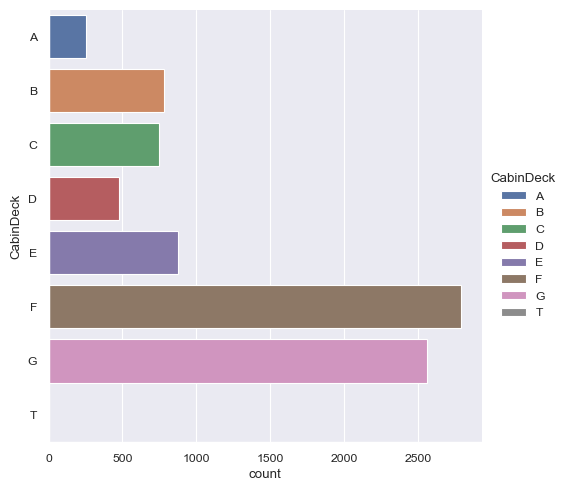

In [35]:
sns.catplot(data=data, y="CabinDeck", kind="count", hue="CabinDeck",
            order=sorted(data["CabinDeck"].dropna().unique()))
plt.show()

C:\Users\agarw\AppData\Local\Temp\ipykernel_20852\1544893042.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[["CabinDeck", "Transported"]].groupby(


<Axes: ylabel='CabinDeck'>

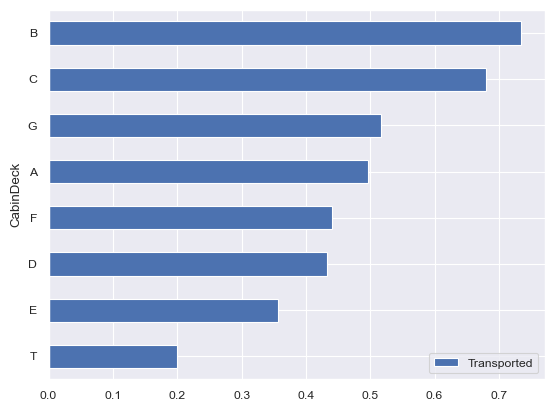

In [36]:
data[["CabinDeck", "Transported"]].groupby(
    by="CabinDeck").agg("mean").sort_values("Transported").plot(kind="barh")

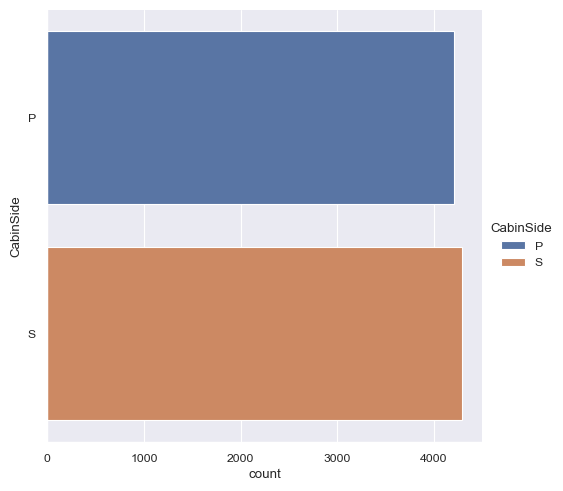

In [37]:
sns.catplot(data=data, y="CabinSide", kind="count", hue="CabinSide")

C:\Users\agarw\AppData\Local\Temp\ipykernel_20852\3767652683.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[["CabinSide", "Transported"]].groupby(


<Axes: ylabel='CabinSide'>

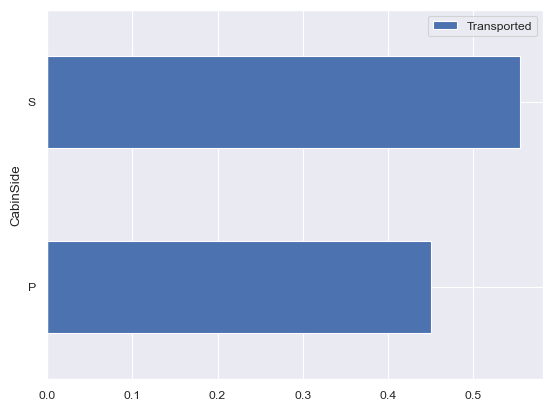

In [38]:
data[["CabinSide", "Transported"]].groupby(
    by="CabinSide").agg("mean").sort_values("Transported").plot(kind="barh")

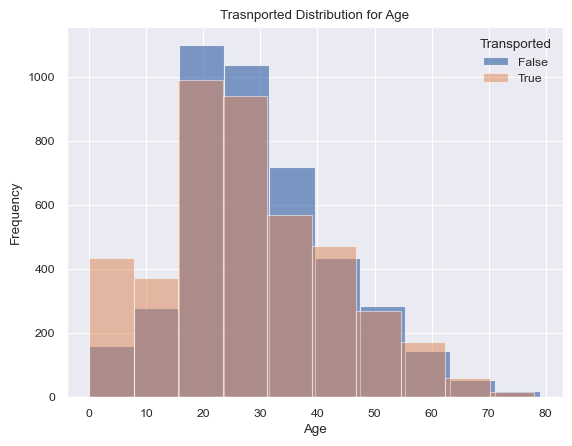

In [39]:
data[data["Transported"] == False]["Age"].plot(
    kind="hist", alpha=0.7, label="False")
data[data["Transported"] == True]["Age"].plot(
    kind="hist", alpha=0.5, label="True")
plt.legend(title="Transported", frameon=False)
plt.xlabel("Age")
plt.title("Trasnported Distribution for Age")
plt.show()

In [40]:
data["Transported"].value_counts(normalize=True)

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

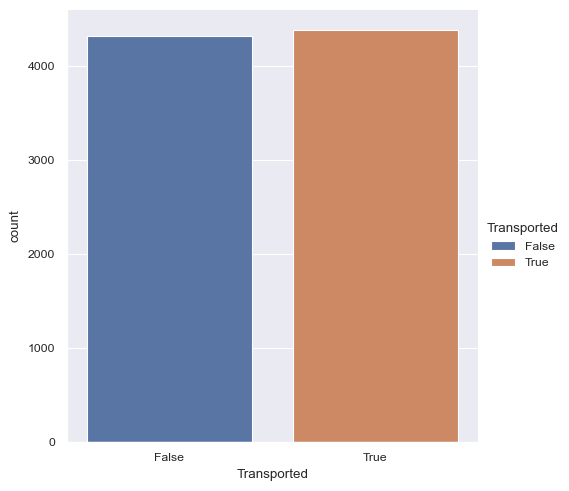

In [41]:
sns.catplot(data=data, x="Transported", kind="count", hue="Transported")

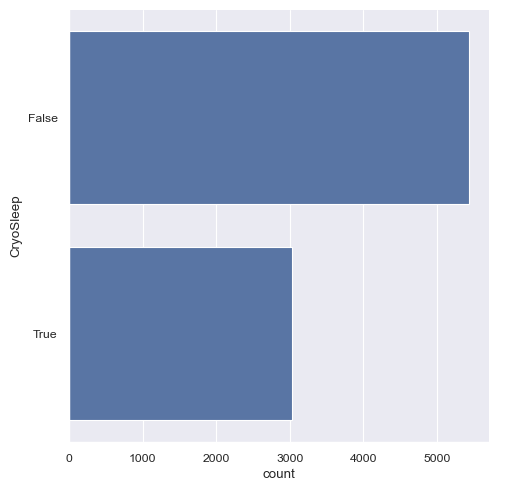

In [42]:
sns.catplot(data=data, y="CryoSleep", kind="count")

<Axes: ylabel='CryoSleep'>

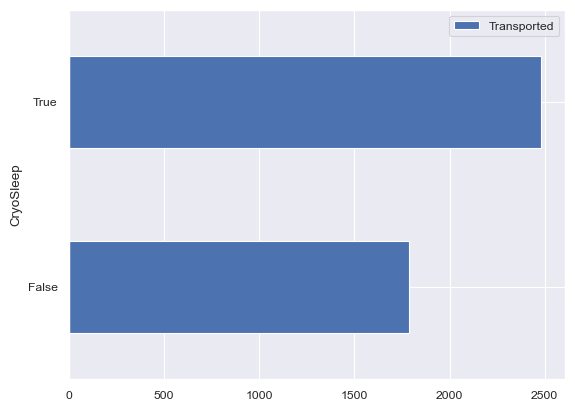

In [43]:
data[["CryoSleep", "Transported"]].groupby(
    "CryoSleep").agg("sum").plot(kind="barh")

<Axes: ylabel='CryoSleep'>

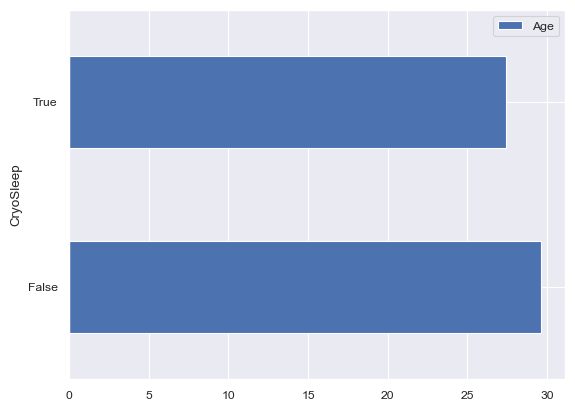

In [44]:
data[["CryoSleep", "Age"]].groupby(
    "CryoSleep").agg("mean").plot(kind="barh")

<Axes: ylabel='CryoSleep'>

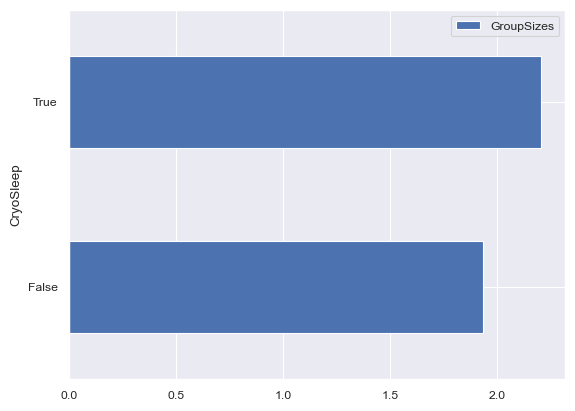

In [45]:
data[["CryoSleep", "GroupSizes"]].groupby(
    "CryoSleep").agg("mean").plot(kind="barh")

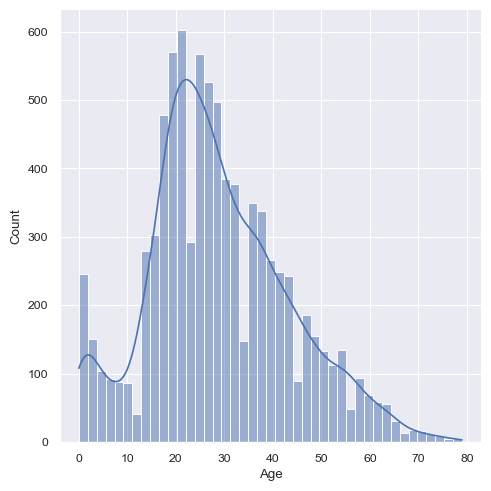

In [46]:
sns.displot(data=data, x="Age", kind="hist", kde=True)

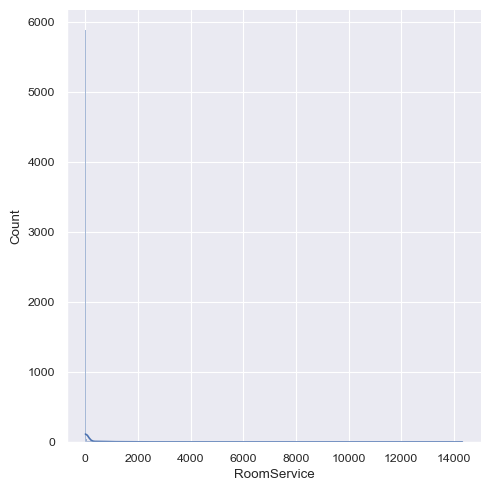

In [47]:
sns.displot(data=data, x="RoomService", kind="hist", kde=True)

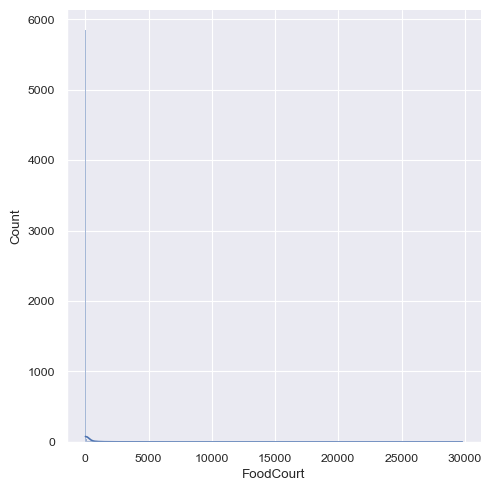

In [48]:
sns.displot(data=data, x="FoodCourt", kind="hist", kde=True)

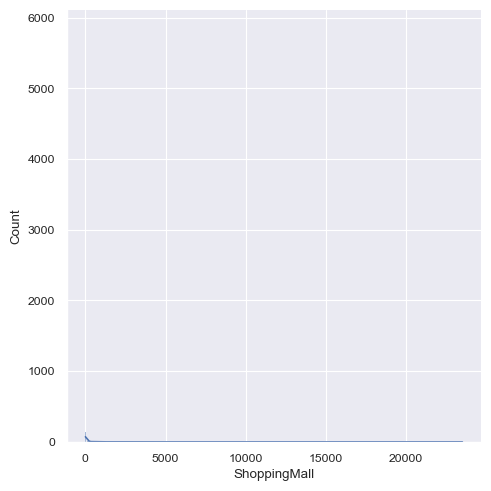

In [49]:
sns.displot(data=data, x="ShoppingMall", kind="hist", kde=True)

In [50]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'GroupID', 'GroupSizes', 'CabinDeck', 'CabinNum',
       'CabinSide'],
      dtype='object')

In [51]:
import miceforest as mf

In [52]:
x_train = data.drop(columns=["Transported", "PassengerId", "Cabin", "Name"])

In [53]:
x_train.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck GroupID  GroupSizes CabinDeck  CabinNum  \
0           0.0     0.0     0.0    0001           1         B       0.0   
1          25.0   549.0    44.0    0002           1         F       0.0   
2           0.0  6715.0    49.0    0003           2         A       0.0   
3         371.0  3329.0   193.0    0003           2         A       0.0   
4         151.0   565.0     2.0    0004           1         F       1.0   

  CabinSide  
0         P  
1         S  
2         S  
3         S  
4         S

In [54]:
x_train = pd.get_dummies(x_train, dtype=int)

In [55]:
x_train.head()

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  GroupSizes  \
0  39.0          0.0        0.0           0.0     0.0     0.0           1   
1  24.0        109.0        9.0          25.0   549.0    44.0           1   
2  58.0         43.0     3576.0           0.0  6715.0    49.0           2   
3  33.0          0.0     1283.0         371.0  3329.0   193.0           2   
4  16.0        303.0       70.0         151.0   565.0     2.0           1   

   CabinNum  HomePlanet_Earth  HomePlanet_Europa  ...  CabinDeck_A  \
0       0.0                 0                  1  ...            0   
1       0.0                 1                  0  ...            0   
2       0.0                 0                  1  ...            1   
3       0.0                 0                  1  ...            1   
4       1.0                 1                  0  ...            0   

   CabinDeck_B  CabinDeck_C  CabinDeck_D  CabinDeck_E  CabinDeck_F  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            1   

   CabinDeck_G  CabinDeck_T  CabinSide_P  CabinSide_S  
0            0            0            1            0  
1            0            0            0            1  
2            0            0            0            1  
3            0            0            0            1  
4            0            0            0            1  

[5 rows x 6245 columns]

In [56]:
x_train.isna().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
               ... 
CabinDeck_F       0
CabinDeck_G       0
CabinDeck_T       0
CabinSide_P       0
CabinSide_S       0
Length: 6245, dtype: int64

In [57]:
kernel = mf.ImputationKernel(
    data=x_train,
    num_datasets=1,
    save_all_iterations_data=True,
    random_state=42
)
kernel.mice(2, verbose=True)

Initialized logger with name MICE Iterations 1 - 2 and 4 levels
1 Dataset 0
 | ShoppingMall | CabinNum | VRDeck | FoodCourt | Spa | RoomService | Age
2 Dataset 0
 | ShoppingMall | CabinNum | VRDeck | FoodCourt | Spa | RoomService | Age


In [58]:
kernel


              Class: ImputationKernel
            Datasets: 1
          Iterations: 2
        Data Samples: 8693
        Data Columns: 6245
   Imputed Variables: 7
   Modeled Variables: 7
All Iterations Saved: True
        

In [59]:
import lightgbm as lgb

In [60]:
kernel.complete_data(0)

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  GroupSizes  \
0     39.0          0.0        0.0           0.0     0.0     0.0           1   
1     24.0        109.0        9.0          25.0   549.0    44.0           1   
2     58.0         43.0     3576.0           0.0  6715.0    49.0           2   
3     33.0          0.0     1283.0         371.0  3329.0   193.0           2   
4     16.0        303.0       70.0         151.0   565.0     2.0           1   
...    ...          ...        ...           ...     ...     ...         ...   
8688  41.0          0.0     6819.0           0.0  1643.0    74.0           1   
8689  18.0          0.0        0.0           0.0     0.0     0.0           1   
8690  26.0          0.0        0.0        1872.0     1.0     0.0           1   
8691  32.0          0.0     1049.0           0.0   353.0  3235.0           2   
8692  44.0        126.0     4688.0           0.0     0.0    12.0           2   

      CabinNum  HomePlanet_Earth  HomePlanet_Europa  ...  CabinDeck_A  \
0          0.0                 0                  1  ...            0   
1          0.0                 1                  0  ...            0   
2          0.0                 0                  1  ...            1   
3          0.0                 0                  1  ...            1   
4          1.0                 1                  0  ...            0   
...        ...               ...                ...  ...          ...   
8688      98.0                 0                  1  ...            1   
8689    1499.0                 1                  0  ...            0   
8690    1500.0                 1                  0  ...            0   
8691     608.0                 0                  1  ...            0   
8692     608.0                 0                  1  ...            0   

      CabinDeck_B  CabinDeck_C  CabinDeck_D  CabinDeck_E  CabinDeck_F  \
0               1            0            0            0            0   
1               0            0            0            0            1   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            1   
...           ...          ...          ...          ...          ...   
8688            0            0            0            0            0   
8689            0            0            0            0            0   
8690            0            0            0            0            0   
8691            0            0            0            1            0   
8692            0            0            0            1            0   

      CabinDeck_G  CabinDeck_T  CabinSide_P  CabinSide_S  
0               0            0            1            0  
1               0            0            0            1  
2               0            0            0            1  
3               0            0            0            1  
4               0            0            0            1  
...           ...          ...          ...          ...  
8688            0            0            1            0  
8689            1            0            0            1  
8690            1            0            0            1  
8691            0            0            0            1  
8692            0            0            0            1  

[8693 rows x 6245 columns]